In [1]:
import pandas as pd

df = pd.read_json('./data/CRWEAPONS-e5ab49/nfts_processed.json', orient='index').reset_index(drop=True)

In [2]:
tmp = df[df['realPriceAmount'].notnull()]
# tmp.sort_values(by=['starLevel', 'level'], ascending=[False, False])

In [3]:
for name in tmp['name'].unique():
    tmp2 = tmp[tmp['name'] == name]
    print(tmp2.sort_values('realPriceAmount').head(10).filter(items=['identifier', 'name', 'realPriceAmount', 'starLevel', 'level']))

                 identifier       name  realPriceAmount  starLevel  level
2559  CRWEAPONS-e5ab49-13cc  Railgun-X         0.023333        3.0    1.0
2277  CRWEAPONS-e5ab49-12b3  Railgun-X         0.024667        2.0    1.0
2241  CRWEAPONS-e5ab49-128f  Railgun-X         0.025000        2.0    1.0
2968  CRWEAPONS-e5ab49-1565  Railgun-X         0.025000        3.0    1.0
2801  CRWEAPONS-e5ab49-14be  Railgun-X         0.030000        2.0    1.0
2515  CRWEAPONS-e5ab49-13a0  Railgun-X         0.033000        2.0    1.0
2404  CRWEAPONS-e5ab49-1331  Railgun-X         0.033333        2.0    1.0
2196  CRWEAPONS-e5ab49-1262  Railgun-X         0.033333        3.0    1.0
2874  CRWEAPONS-e5ab49-1507  Railgun-X         0.033333        2.0    1.0
2880  CRWEAPONS-e5ab49-150d  Railgun-X         0.036667        2.0    1.0
                 identifier         name  realPriceAmount  starLevel  level
2489  CRWEAPONS-e5ab49-1386  Boomstick-X         0.036667        2.0    1.0
2494  CRWEAPONS-e5ab49-138b  Booms

/tmp/ipykernel_24955/1737912879.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['starLevel'] = tmp['starLevel'].astype(int)
/tmp/ipykernel_24955/1737912879.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['level'] = tmp['level'].astype(int)


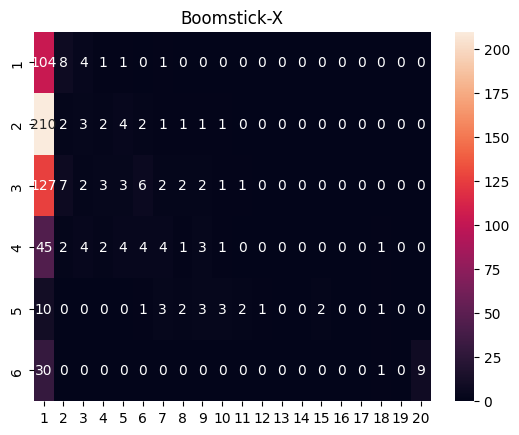

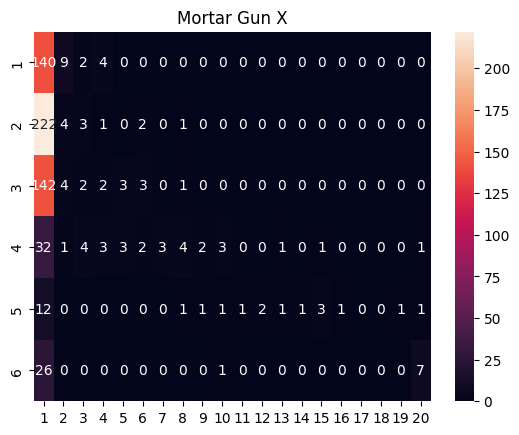

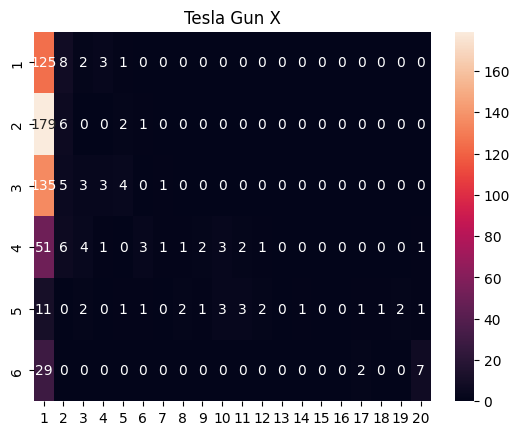

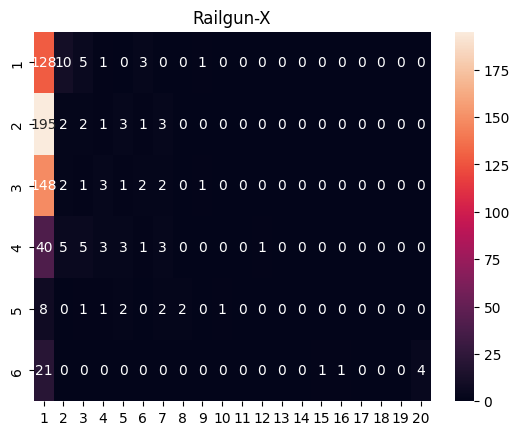

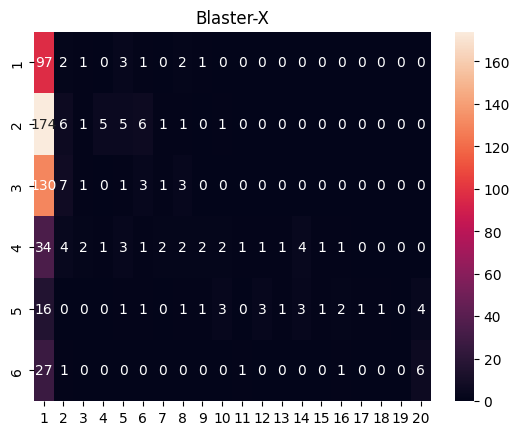

In [4]:
# for each name, plot heatmap of starLevel vs level (there are 6 starLevels and 20 levels)
# display all the possible combinations of starLevel and level
# and count the number of occurrences of each combination

import matplotlib.pyplot as plt
import seaborn as sns

tmp = df[df['starLevel'].notna() & df['level'].notna()]
tmp['starLevel'] = tmp['starLevel'].astype(int)
tmp['level'] = tmp['level'].astype(int)
for name in df['name'].unique():
    tmp2 = tmp[tmp['name'] == name]
    d = tmp2.groupby(['starLevel', 'level']).size().to_dict()
    for i in range(6):
        for j in range(20):
            starLevel = i + 1
            level = j + 1
            if (starLevel, level) not in d:
                d[(starLevel, level)] = 0
    sns.heatmap(pd.Series(d).unstack(fill_value=0), annot=True, fmt='d')
    plt.title(name)
    plt.show()


In [5]:
tmp.sort_values(by=['starLevel', 'level'], ascending=[False, False]).head(20)

,identifier,collection,name,url,thumbnailUrl,owner,rank,priceCurrency,priceAmount,xp,wear,level,starLevel,damage,reloadTime,ammo,range,realPriceAmount
9,CRWEAPONS-e5ab49-0122,CRWEAPONS-e5ab49,Tesla Gun X,https://media.elrond.com/nfts/asset/bafybeibrx...,https://media.elrond.com/nfts/thumbnail/CRWEAP...,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,NaN,None,NaN,121200.0,100.0,20,6,3100.0,2.70,2.0,9.5,NaN
62,CRWEAPONS-e5ab49-024d,CRWEAPONS-e5ab49,Railgun-X,https://media.elrond.com/nfts/asset/bafybeibrx...,https://media.elrond.com/nfts/thumbnail/CRWEAP...,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,NaN,None,NaN,1212.0,9.0,20,6,2862.0,2.40,2.0,11.0,NaN
64,CRWEAPONS-e5ab49-0267,CRWEAPONS-e5ab49,Tesla Gun X,https://media.elrond.com/nfts/asset/bafybeibrx...,https://media.elrond.com/nfts/thumbnail/CRWEAP...,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,NaN,None,NaN,76949.0,100.0,20,6,3100.0,2.70,2.0,9.5,NaN
65,CRWEAPONS-e5ab49-0269,CRWEAPONS-e5ab49,Boomstick-X,https://media.elrond.com/nfts/asset/bafybeibrx...,https://media.elrond.com/nfts/thumbnail/CRWEAP...,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,NaN,None,NaN,13317.0,69.3,20,6,4704.0,2.10,3.0,9.0,NaN
72,CRWEAPONS-e5ab49-027d,CRWEAPONS-e5ab49,Blaster-X,https://media.elrond.com/nfts/asset/bafybeibrx...,https://media.elrond.com/nfts/thumbnail/CRWEAP...,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,NaN,None,NaN,121200.0,100.0,20,6,4090.0,2.75,3.0,10.5,NaN
102,CRWEAPONS-e5ab49-02d8,CRWEAPONS-e5ab49,Mortar Gun X,https://media.elrond.com/nfts/asset/bafybeibrx...,https://media.elrond.com/nfts/thumbnail/CRWEAP...,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,NaN,None,NaN,245294.0,7.4,20,6,3357.0,3.00,3.0,9.0,NaN
109,CRWEAPONS-e5ab49-0305,CRWEAPONS-e5ab49,Mortar Gun X,https://media.elrond.com/nfts/asset/bafybeibrx...,https://media.elrond.com/nfts/thumbnail/CRWEAP...,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,NaN,None,NaN,27688.0,96.3,20,6,3357.0,3.00,3.0,9.0,NaN
110,CRWEAPONS-e5ab49-030a,CRWEAPONS-e5ab49,Railgun-X,https://media.elrond.com/nfts/asset/bafybeibrx...,https://media.elrond.com/nfts/thumbnail/CRWEAP...,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,NaN,None,NaN,121218.0,100.0,20,6,2862.0,2.40,2.0,11.0,NaN
113,CRWEAPONS-e5ab49-0311,CRWEAPONS-e5ab49,Tesla Gun X,https://media.elrond.com/nfts/asset/bafybeibrx...,https://media.elrond.com/nfts/thumbnail/CRWEAP...,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,NaN,None,NaN,121219.0,100.0,20,6,3100.0,2.70,2.0,9.5,NaN
127,CRWEAPONS-e5ab49-033c,CRWEAPONS-e5ab49,Railgun-X,https://media.elrond.com/nfts/asset/bafybeibrx...,https://media.elrond.com/nfts/thumbnail/CRWEAP...,erd1qqqqqqqqqqqqqpgq5dz6p0nsz35sht95kp6vjrznff...,NaN,None,NaN,122314.0,100.0,20,6,2862.0,2.40,2.0,11.0,NaN


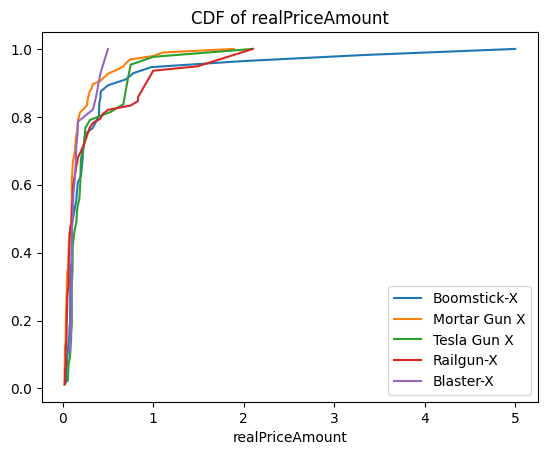

In [6]:
import matplotlib.pyplot as plt

for name in tmp['name'].unique():
    # plot cdf of realPriceAmount
    cdf = tmp[tmp['name'] == name]['realPriceAmount'].value_counts().sort_index().cumsum()
    cdf = cdf / cdf.max()
    cdf.plot(label=name)
plt.legend()
plt.title('CDF of realPriceAmount')
plt.show()
